In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score

In [21]:
df = pd.read_csv("../data/shopping_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
# Drop irrelevant column
df.drop(columns="Customer ID", axis=1, inplace=True)

In [23]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

## Preprocessing

In [24]:
numerical_columns = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]
numerical_columns

['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

In [25]:
categorical_columns = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]]
categorical_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

## Scaling Numerical Data..
reasons:
- Avoiding Feature Domination
- its imp for Gradient-based models, Distance-based models, and Models that use regularization(L1, L2)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
df[numerical_columns] = sc.fit_transform(df[numerical_columns])
df[numerical_columns]

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


## Categorical Data Encoding
- converting categorical data into numerical..
  

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
le = LabelEncoder()
ohe = OneHotEncoder(drop='first') #to remove multicoliniarity 

In [30]:
#Applying Label Encoding...
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Status'] = le.fit_transform(df['Subscription Status'])
df['Promo Code Used'] = le.fit_transform(df['Promo Code Used'])
df['Discount Applied'] = le.fit_transform(df['Discount Applied'])

In [31]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0.718913,1,Blouse,Clothing,-0.285629,Kentucky,L,Gray,Winter,-0.907584,1,Credit Card,Express,1,1,-0.785831,Venmo,Fortnightly
1,-1.648629,1,Sweater,Clothing,0.178852,Maine,L,Maroon,Winter,-0.907584,1,Bank Transfer,Express,1,1,-1.616552,Cash,Fortnightly
2,0.390088,1,Jeans,Clothing,0.558882,Massachusetts,S,Maroon,Spring,-0.907584,1,Cash,Free Shipping,1,1,-0.162789,Credit Card,Weekly
3,-1.517099,1,Sandals,Footwear,1.276716,Rhode Island,M,Maroon,Spring,-0.349027,1,PayPal,Next Day Air,1,1,1.637107,PayPal,Weekly
4,0.061263,1,Blouse,Clothing,-0.454531,Oregon,M,Turquoise,Spring,-1.466141,1,Cash,Free Shipping,1,1,0.391025,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.267563,0,Hoodie,Clothing,-1.341267,Virginia,L,Turquoise,Summer,0.628448,0,Cash,2-Day Shipping,0,0,0.460252,Venmo,Weekly
3896,0.521618,0,Backpack,Accessories,-0.454531,Iowa,L,White,Spring,1.047366,0,PayPal,Store Pickup,0,0,1.083293,Bank Transfer,Bi-Weekly
3897,0.127028,0,Belt,Accessories,-1.130139,New Jersey,L,Green,Spring,-1.186862,0,Credit Card,Standard,0,0,-0.093563,Venmo,Quarterly
3898,-0.004502,0,Shoes,Footwear,0.727784,Minnesota,S,Brown,Summer,0.069891,0,PayPal,Express,0,0,-0.093563,Venmo,Weekly


In [32]:
# Applying OneHotEncoding..
encoded_columns = ohe.fit_transform(df[['Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                                        'Season', 'Payment Method', 'Shipping Type', 
                                        'Preferred Payment Method','Frequency of Purchases']]).toarray()

# Converting the encoded columns into a DataFrame...
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out())
transformed_df = pd.concat([df, encoded_df], axis=1)

In [33]:
transformed_df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,1,Blouse,Clothing,-0.285629,Kentucky,L,Gray,Winter,-0.907584,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.648629,1,Sweater,Clothing,0.178852,Maine,L,Maroon,Winter,-0.907584,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.390088,1,Jeans,Clothing,0.558882,Massachusetts,S,Maroon,Spring,-0.907584,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.517099,1,Sandals,Footwear,1.276716,Rhode Island,M,Maroon,Spring,-0.349027,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061263,1,Blouse,Clothing,-0.454531,Oregon,M,Turquoise,Spring,-1.466141,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.267563,0,Hoodie,Clothing,-1.341267,Virginia,L,Turquoise,Summer,0.628448,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,0.521618,0,Backpack,Accessories,-0.454531,Iowa,L,White,Spring,1.047366,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,0.127028,0,Belt,Accessories,-1.130139,New Jersey,L,Green,Spring,-1.186862,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,-0.004502,0,Shoes,Footwear,0.727784,Minnesota,S,Brown,Summer,0.069891,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
transformed_df.drop(columns=['Item Purchased', 'Category', 'Location', 'Size', 'Color','Season', 'Payment Method', 'Shipping Type','Preferred Payment Method','Frequency of Purchases'], axis=1, inplace=True)

In [36]:
transformed_df["Subscription Status"].value_counts()

Subscription Status
0    2847
1    1053
Name: count, dtype: int64

# Feature Selection..


In [37]:
# input features and target...
feature_df = transformed_df.drop(columns="Subscription Status", axis=1)
target_df = transformed_df["Subscription Status"]

In [38]:
corr_matrix= feature_df.corr()
#target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)


In [41]:
threshold = 0.5
highly_correlated_features = [corr_matrix.columns[j] for i in range(len(corr_matrix.columns)) for j in range(i + 1, len(corr_matrix.columns)) if abs(corr_matrix.iloc[i, j]) > threshold]
len(highly_correlated_features)

5

In [42]:
#reducing multicolinearity....
X = feature_df.drop(highly_correlated_features, axis=1)
y = target_df

In [43]:
X.shape, y.shape

((3900, 131), (3900,))

# Logistic Regression..

## Experiment_1

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)

In [47]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [48]:
print(f"PREDICTION: \n {y_pred} \n")
print(f"PREDICTION_PROBA: \n {y_pred_proba}\n")
#print(f"ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")

PREDICTION: 
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 

# XGBoost...

In [53]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [55]:
X_train.shape

(3120, 131)

In [56]:
xg_model = XGBClassifier(scale_pos_weight=45, random_state = 42)

In [57]:
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
y_pred = xg_model.predict(X_test)
y_train_pred = xg_model.predict(X_train)
y_pred_proba = xg_model.predict_proba(X_test)
y_train_pred_proba = xg_model.predict_proba(X_train)

TEST-ACCURACY-SCORE: 
 0.6384615384615384

TRAIN-ACCURACY-SCORE: 
 0.8955128205128206

F1-SCORE: 
 0.5252525252525253

PRECISION: 
 0.4073107049608355

RECALL: 
 0.7393364928909952

ROC-AUC-SCORE: 
 0.7407441341340508

CONFUSION_MATRIX: 
 [[342 227]
 [ 55 156]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.86      0.60      0.71       569
           1       0.41      0.74      0.53       211

    accuracy                           0.64       780
   macro avg       0.63      0.67      0.62       780
weighted avg       0.74      0.64      0.66       780



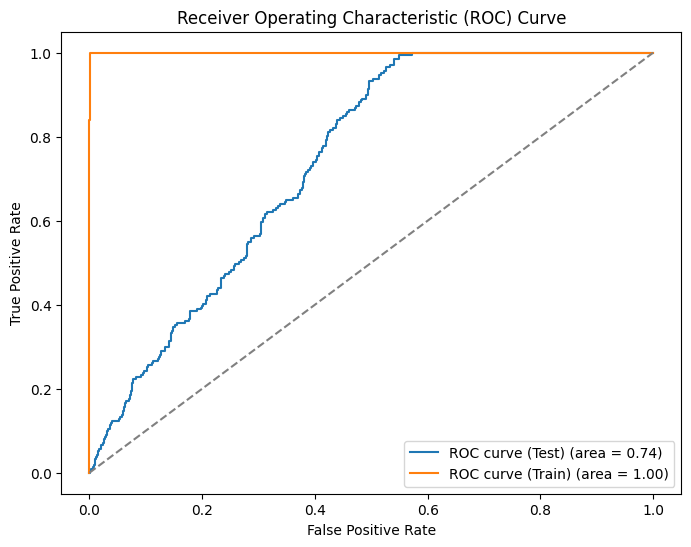

In [59]:
print(f"TEST-ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"TRAIN-ACCURACY-SCORE: \n {accuracy_score(y_train, y_train_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"PRECISION: \n {precision_score(y_test, y_pred)}\n")
print(f"RECALL: \n {recall_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (Test) (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot(fpr_train, tpr_train, label="ROC curve (Train) (area = %0.2f)" % roc_auc_score(y_train, y_train_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()